In [1]:
import numpy as np
from neuralStellar2 import stellarGrid,NNmodel
from datetime import datetime, timedelta
from matplotlib import rc
rc("font", family="serif", size=14)
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1, l2
import pickle
import seaborn as sns

Using TensorFlow backend.


In [2]:
file='grid2_trun.csv'
grid1=stellarGrid(file)
grid1.loadData()
grid1.popIndex(['Unnamed: 0','star_mass','star_age','star_feh','initial_Yinit','initial_MLT','luminosity','radius','effective_T','delta_nu'])
grid1.initialData()

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')


In [18]:
df_list = []
for track_no in grid1.data['track_no'].unique():
    track = grid1.data[grid1.data['track_no']==track_no]
    if len(track[track.Teff<10**3.72].index)>400:
        pre_RGB = track[track.Teff>=10**3.72]
        RGB = track[track.Teff<10**3.72]
        RGB = RGB[RGB.index % 3 == 0]
        to_append = pd.concat([pre_RGB,RGB])
        df_list.append(to_append)
    else:
        df_list.append(track)
resulting = pd.concat(df_list)
resulting

,step,evol_stage,initial_mass,Y,initial_feh,MLT,mass,age,Teff,L,radius,feh,delnu,nu_max,tenfeh,tenstarfeh,track_no
step,,,,,,,,,,,,,,,,,
53609,53609,1,0.84,0.26,-0.2,1.7,0.840000,1.022646,5354.768930,0.444604,0.775825,-0.20000,188.646881,4493.594458,0.630957,0.630957,0.0
53610,53610,1,0.84,0.26,-0.2,1.7,0.840000,1.218929,5359.828733,0.448671,0.777895,-0.20000,187.909849,4467.602910,0.630957,0.630957,0.0
53611,53611,1,0.84,0.26,-0.2,1.7,0.840000,1.454469,5365.950411,0.453583,0.780358,-0.20000,187.039451,4436.916336,0.630957,0.630957,0.0
53612,53612,1,0.84,0.26,-0.2,1.7,0.840000,1.667359,5371.520465,0.458075,0.782587,-0.20000,186.257521,4409.389834,0.630957,0.630957,0.0
53613,53613,1,0.84,0.26,-0.2,1.7,0.840000,1.869664,5376.830471,0.462398,0.784719,-0.20000,185.514935,4383.292001,0.630957,0.630957,0.0
53614,53614,1,0.84,0.26,-0.2,1.7,0.840000,2.066776,5382.016195,0.466669,0.786816,-0.20000,184.789933,4357.857263,0.630957,0.630957,0.0
53615,53615,1,0.84,0.26,-0.2,1.7,0.840000,2.261238,5387.144502,0.470945,0.788909,-0.20000,184.071726,4332.708479,0.630957,0.630957,0.0
53616,53616,1,0.84,0.26,-0.2,1.7,0.840000,2.454277,5392.230141,0.475255,0.791016,-0.20000,183.353640,4307.622284,0.630957,0.630957,0.0
53617,53617,1,0.84,0.26,-0.2,1.7,0.840000,2.646492,5397.307843,0.479618,0.793144,-0.20000,182.633417,4282.522126,0.630957,0.630957,0.0


In [20]:
proper_columns = resulting.rename(columns={'step':'','Y':'initial_Yinit','MLT':'initial_MLT','mass':'star_mass',
                          'age':'star_age','Teff':'effective_T','L':'luminosity','feh':'star_feh','delnu':'delta_nu'})
shuffled = proper_columns.sample(frac=1)
dropped_track_no = shuffled.drop(columns=['track_no'])
dropped_track_no

,,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,effective_T,luminosity,radius,star_feh,delta_nu,nu_max,tenfeh,tenstarfeh
step,,,,,,,,,,,,,,,,
2664607,2664607,2,1.16,0.30,-0.2,2.1,1.157634,3.701017,6146.531068,6.591443,2.267195,-2.000000e-01,45.393080,676.848195,0.630957,0.630957
6374754,6374754,2,1.64,0.30,0.2,1.9,1.636671,1.870862,4742.703283,25.168477,7.441070,2.108106e-01,9.010449,101.132459,1.584893,1.624840
3386547,3386547,2,1.20,0.26,-0.2,1.9,1.191631,4.920157,4706.518887,33.750324,8.749801,-1.840767e-01,6.089232,53.457466,0.630957,0.654521
3724431,3724431,2,1.32,0.26,0.2,1.7,1.317099,5.220684,4703.219911,4.719844,3.276665,2.042024e-01,27.732735,421.472742,1.584893,1.600304
6221892,6221892,2,1.64,0.28,0.0,2.3,1.639150,1.530369,6784.460045,16.176469,2.915212,1.137986e-10,35.116780,551.738902,1.000000,1.000000
7709888,7709888,2,1.76,0.28,0.0,1.7,1.759407,1.225803,7376.132431,20.907735,2.803851,3.421337e-11,37.736983,613.981026,1.000000,1.000000
2827188,2827188,2,1.24,0.26,0.2,2.3,1.232342,6.889021,4694.546563,33.343249,8.741289,2.161491e-01,6.147556,55.462121,1.584893,1.644936
8256012,8256012,2,1.84,0.30,0.2,1.7,1.835910,1.281717,4477.174960,48.456111,11.585772,2.097462e-01,4.930167,48.162872,1.584893,1.620863
8363220,8363220,2,1.88,0.26,-0.2,2.1,1.868975,1.096247,4654.571107,158.800063,19.405500,-1.886629e-01,2.328524,17.140631,0.630957,0.647645


In [21]:
dropped_track_no.to_csv(path_or_buf='grid2_aug.csv',index=False)

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')


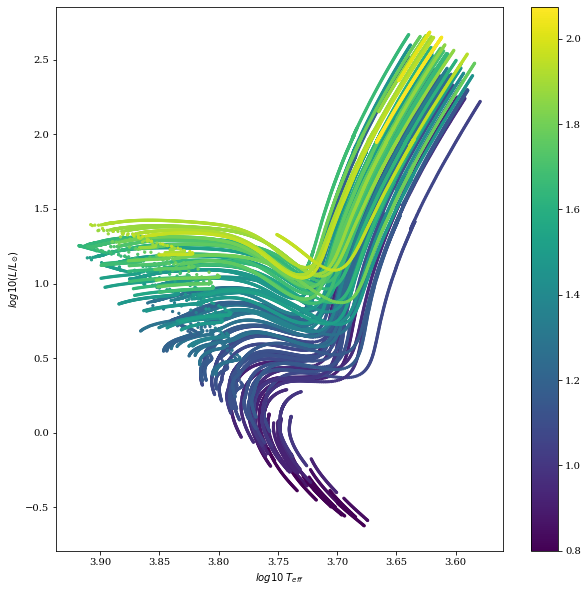

In [23]:
file='grid2_aug.csv'
grid2=stellarGrid(file)
grid2.loadData()
grid2.popIndex(['Unnamed: 0','star_mass','star_age','star_feh','initial_Yinit','initial_MLT','luminosity','radius','effective_T','delta_nu'])
grid2.initialData()
grid2.plotHR('evo',track_no=100)